# **MARRIAGE COUNSELOR**
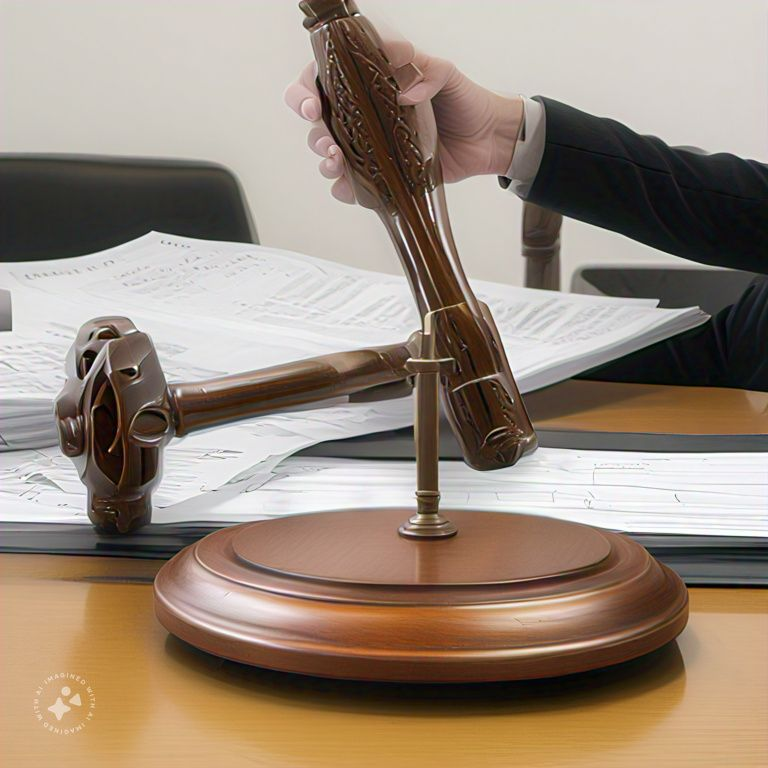

* The primary aim of this project is to provide an in-depth analysis focused on the underlying factors contributing to divorce and the development of predictive models for divorce outcomes.

* Divorce, also referred to as the dissolution of marriage, encompasses the legal process of terminating a marital union. This typically involves the reconfiguration or complete cancellation of the legal obligations and responsibilities associated with marriage, effectively dissolving the marital bond between a married couple, all within the framework of the legal system of the respective country or state.

* It is essential to acknowledge that divorce laws exhibit significant variations across the globe, with each jurisdiction imposing unique requirements and processes. In the majority of countries, obtaining a divorce necessitates the approval of a court or another authorized entity, signifying a legal procedure that often encompasses intricate matters such as the equitable division of property, child custody arrangements, spousal support (alimony), visitation rights for children, parenting schedules, child support, and the apportionment of marital debt.

* Furthermore, it is noteworthy that in many nations, legal norms mandate monogamy. Consequently, divorce grants each former partner the freedom to enter into a new marital union if they so choose, reinforcing the complexity and importance of the subject in the context of relationships and legal systems.

###**INTRODUCTION**

* We have a social public dataset that was collected by asking a number of couples 54 specific questions to which they were expected to respond on a scale of 1 to 4.
* For the purpose of context, 1 represents a strong disagreement while 4 represents a strong agreement.
* The 54 questions asked can be found in the README.txt file.
* This dataset was collaboratively curated by esteemed professionals in the field of psychology and counseling, including Dr. Mustafa Kemal Yöntem, Dr. Kemal ADEM, Prof. Dr. Tahsin İlhan, and Lecturer Serhat Kılıçarslan.

In [78]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from sklearn import manifold
from sklearn.metrics import accuracy_score


In [79]:
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv("divorce_data.csv")

In [81]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [82]:
df.shape

(170, 55)

In [83]:
df.dtypes

,0
Sorry_end,int64
Ignore_diff,int64
begin_correct,int64
Contact,int64
Special_time,int64
No_home_time,int64
2_strangers,int64
enjoy_holiday,int64
enjoy_travel,int64
common_goals,int64


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sorry_end,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Ignore_diff,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
begin_correct,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Contact,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Special_time,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
No_home_time,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
2_strangers,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
enjoy_holiday,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
enjoy_travel,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
common_goals,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


**Insights**

*   All columns are of the type int, as expected
*   All columns are categorical, i.e, we can only expect a 1, 2, 3 or 4
*   The responses seem to be fairly distributed

In [85]:
with open('README.txt') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

que = [x.split('\t')[1] for x in lines[2:]]
que[:5]

# Descriptive statistics
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))

que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'bisque',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
"If one of us apologizes when our discussion deteriorates, the discussion ends.",40.6%,5.3%,8.2%,27.6%,18.2%
"I know we can ignore our differences, even if things get hard sometimes.",34.7%,13.5%,16.5%,22.4%,12.9%
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",30.0%,14.1%,15.3%,30.6%,10.0%
"When I discuss with my spouse, to contact him will eventually work.",44.1%,7.1%,17.6%,18.8%,12.3%
The time I spent with my wife is special for us.,48.2%,5.9%,4.7%,25.9%,15.3%
We don't have time at home as partners.,50.6%,28.8%,17.1%,2.4%,1.2%
We are like two strangers who share the same environment at home rather than family.,67.1%,24.7%,2.9%,2.4%,2.9%
I enjoy our holidays with my wife.,47.6%,5.9%,12.3%,21.8%,12.3%
I enjoy traveling with my wife.,49.4%,4.1%,7.7%,28.8%,10.0%
Most of our goals are common to my spouse.,36.5%,10.6%,22.4%,20.0%,10.6%


**Insights**


*   Majority of responses seem to be falling in the extreme regions, i.e, in the 1s and 4s.
*   WE can decode that for the most questions asked, participants were either in strong agreement, or in strong disagreement.

#Data Cleaning

In [86]:
df.isnull().sum()

,0
Sorry_end,0
Ignore_diff,0
begin_correct,0
Contact,0
Special_time,0
No_home_time,0
2_strangers,0
enjoy_holiday,0
enjoy_travel,0
common_goals,0


#EDA

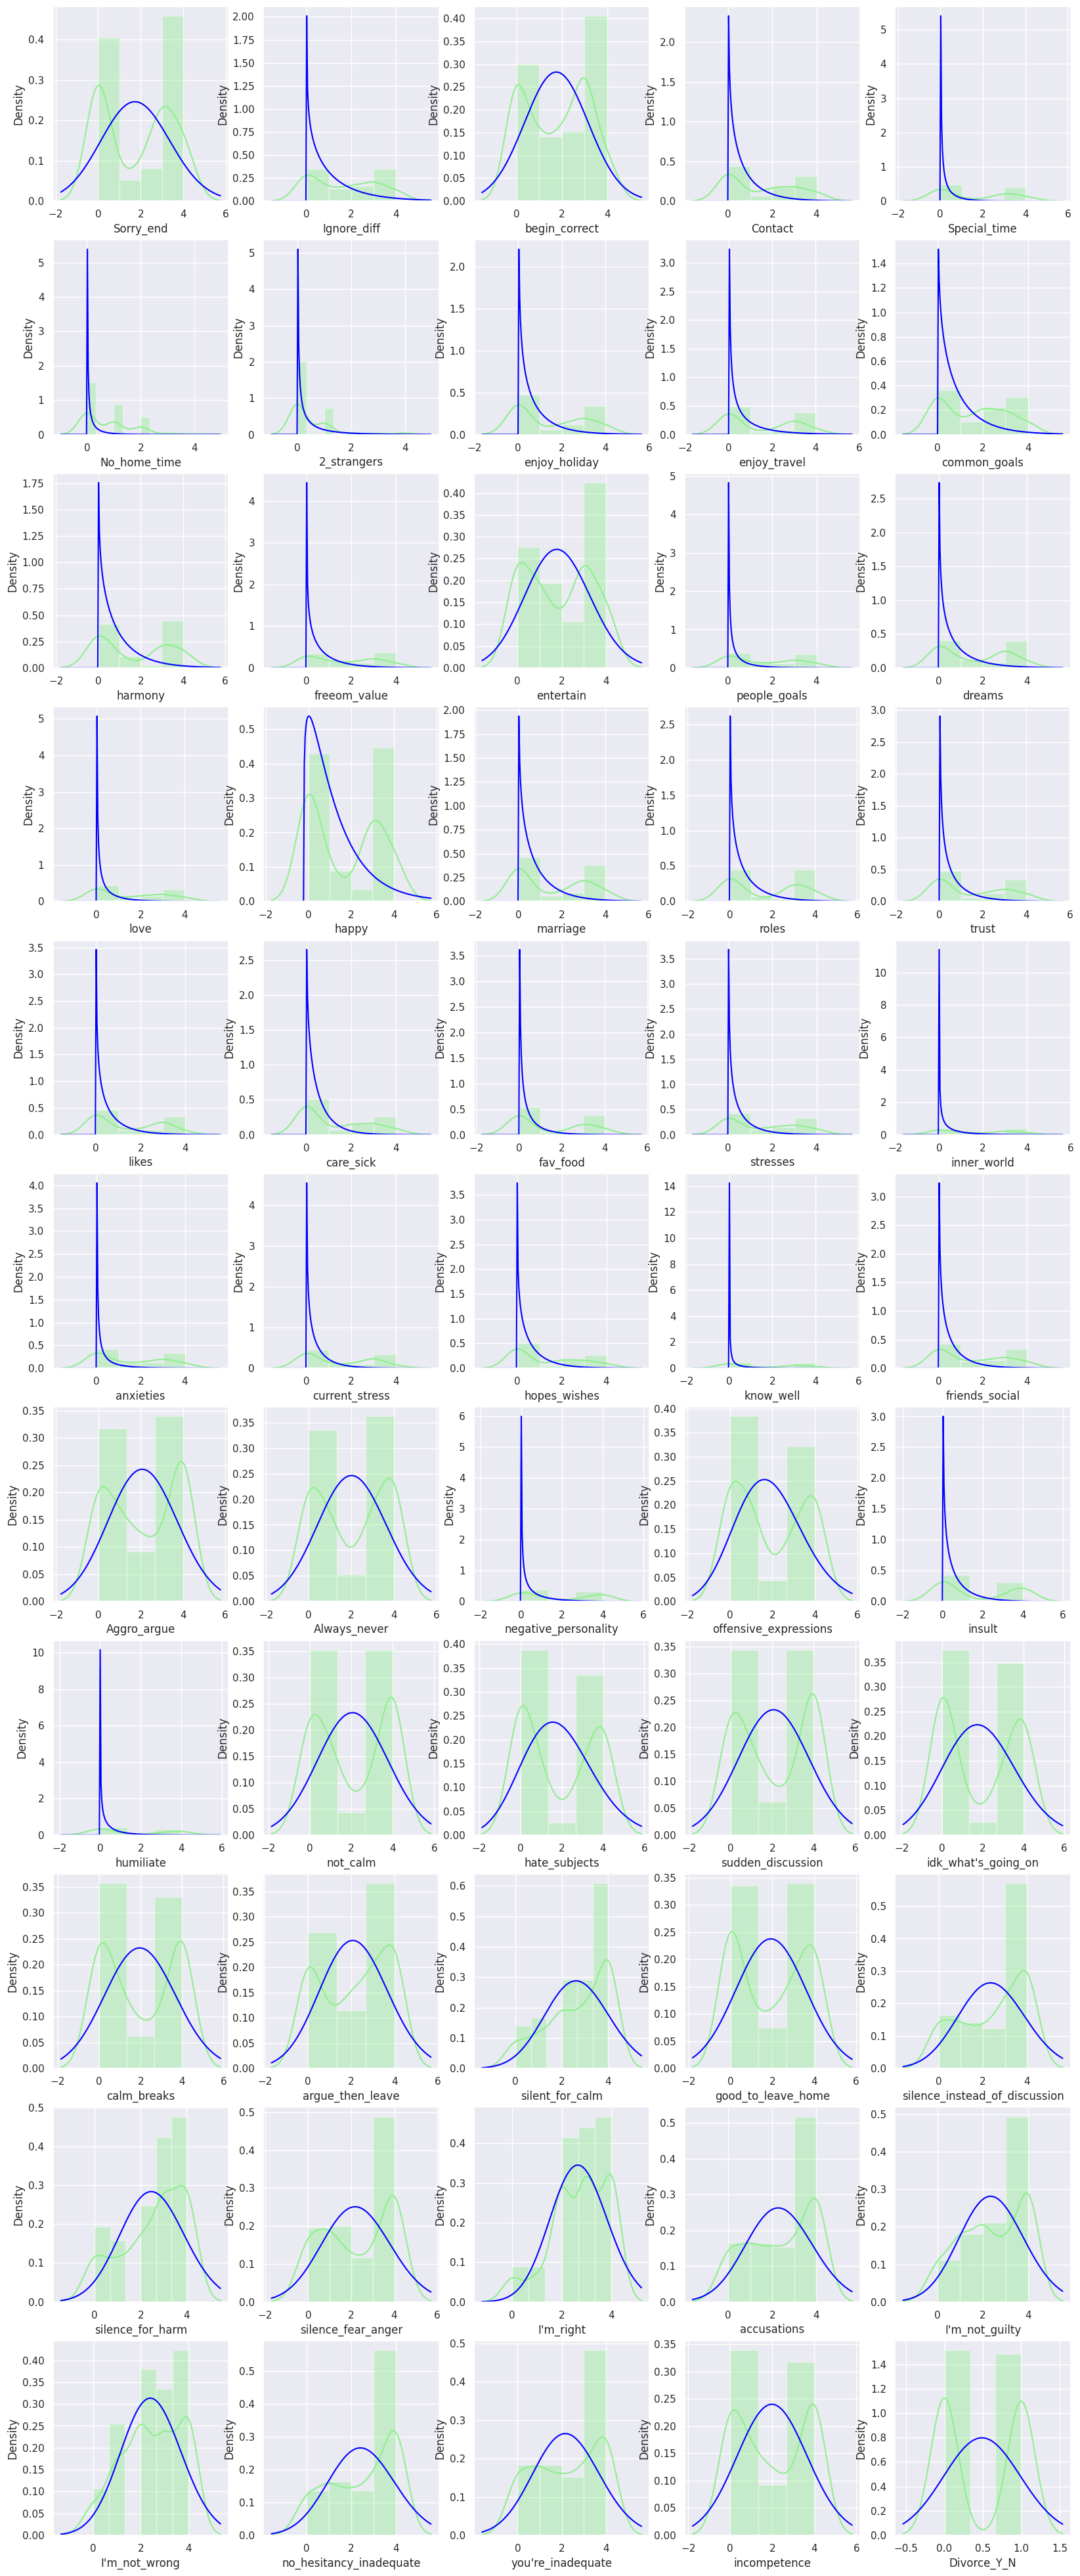

In [87]:
sns.set(rc={'figure.figsize':(20,50)})
col_names=list(df.columns)
for i, column in enumerate(col_names, 1):
    plt.subplot(11,5,i)
    p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")

**Insights**
*   Some features are highly skewed to the left or right while other features are skewed on both sides.

# Correlation Analysis of features against features
For the first set of 11 features

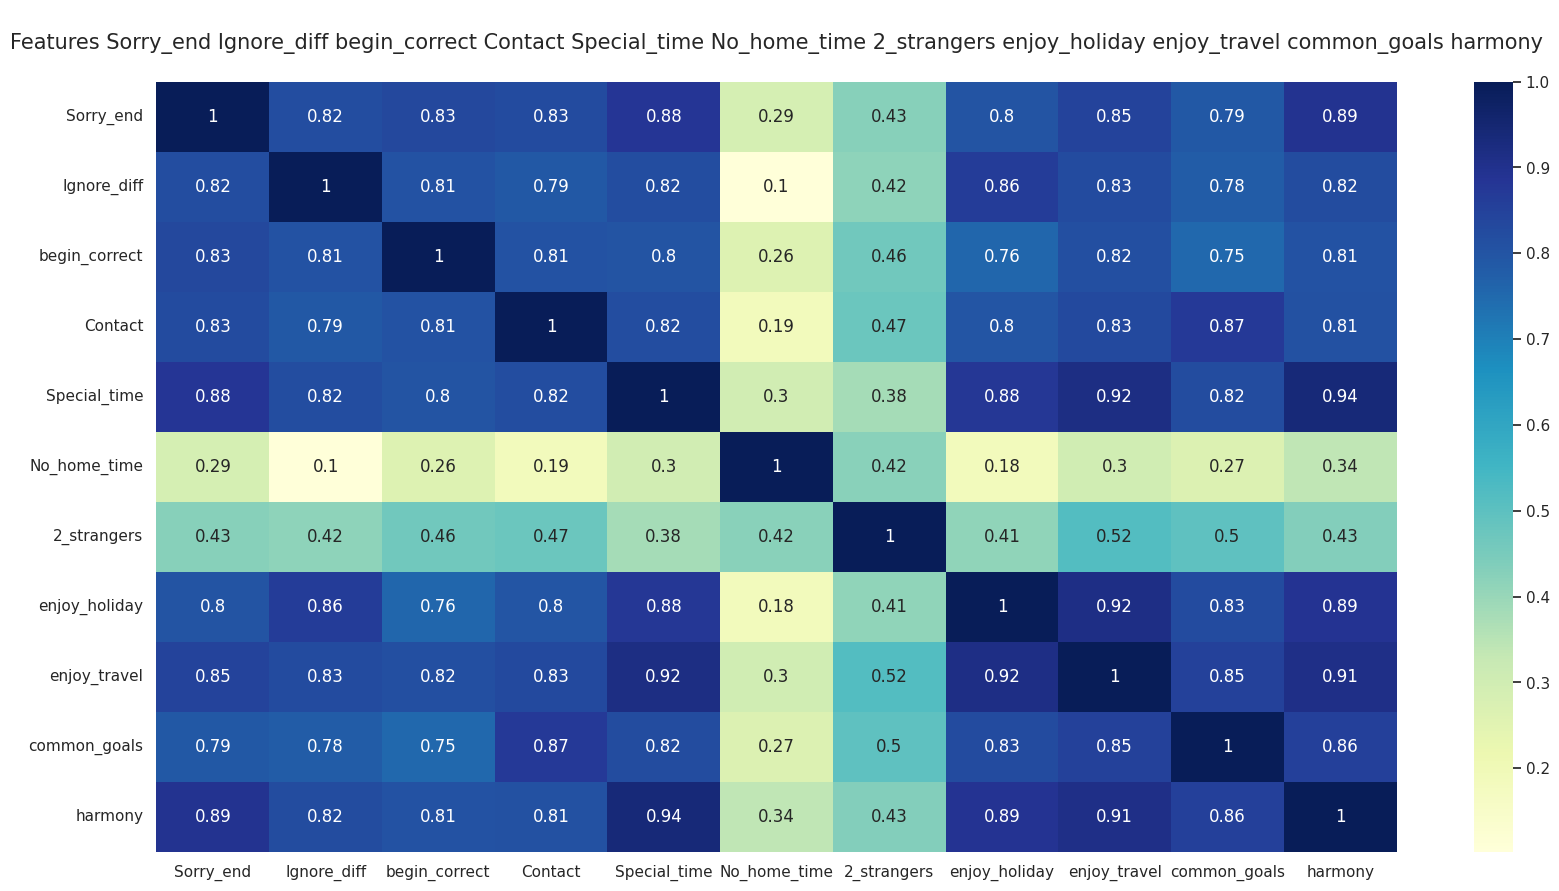

In [88]:
corr=df[col_names[:11]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[:11]])+"\n",fontsize=15);

For the second set of 11 features

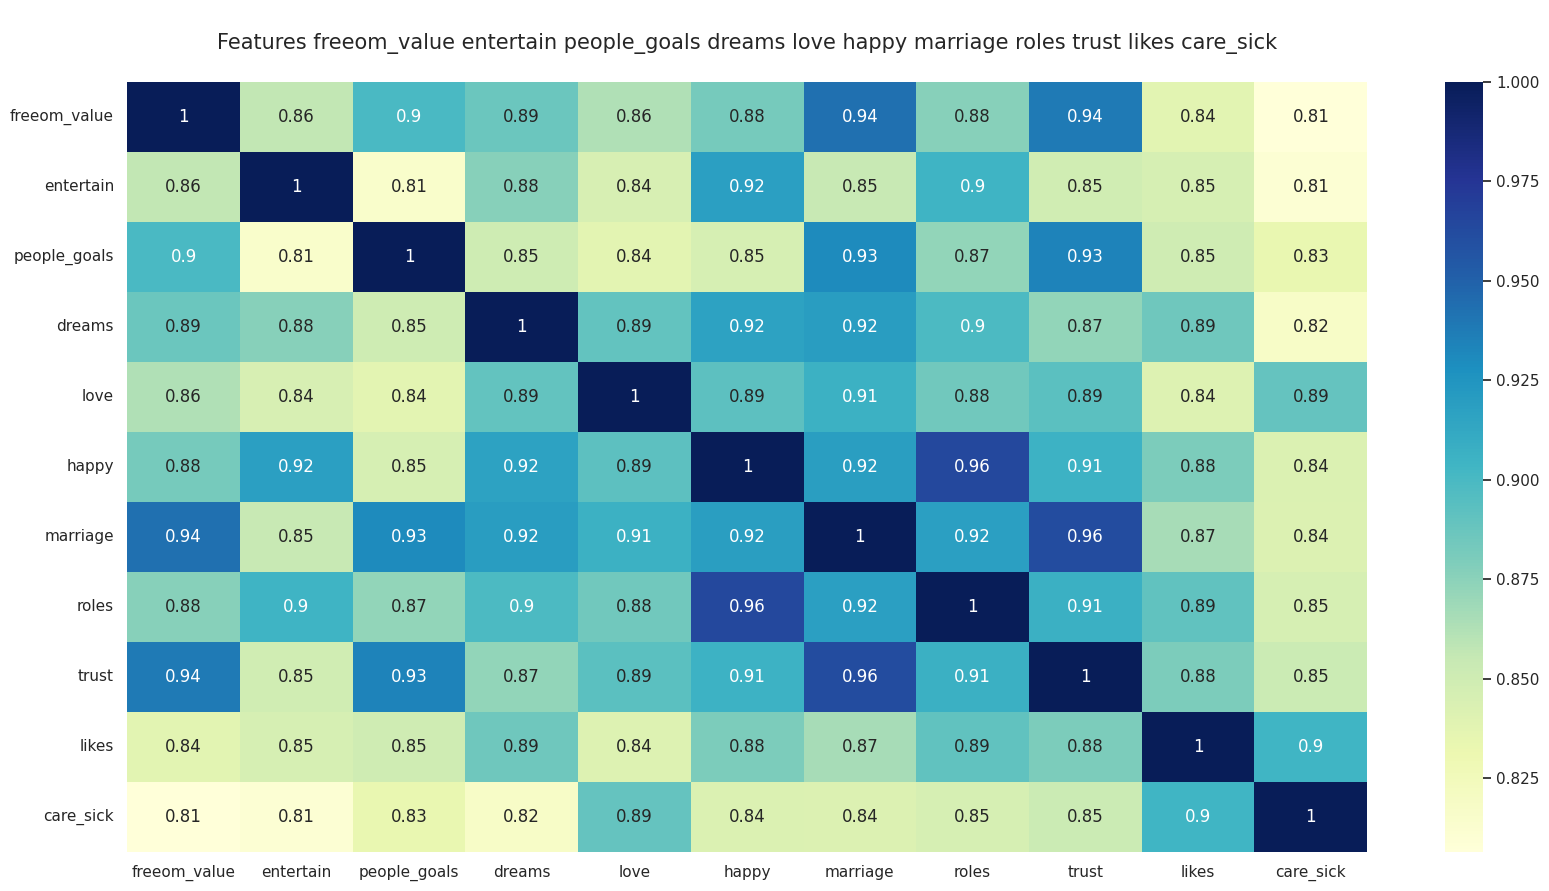

In [89]:
corr=df[col_names[11:22]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[11:22]])+"\n",fontsize=15);

For the third set of 11 features

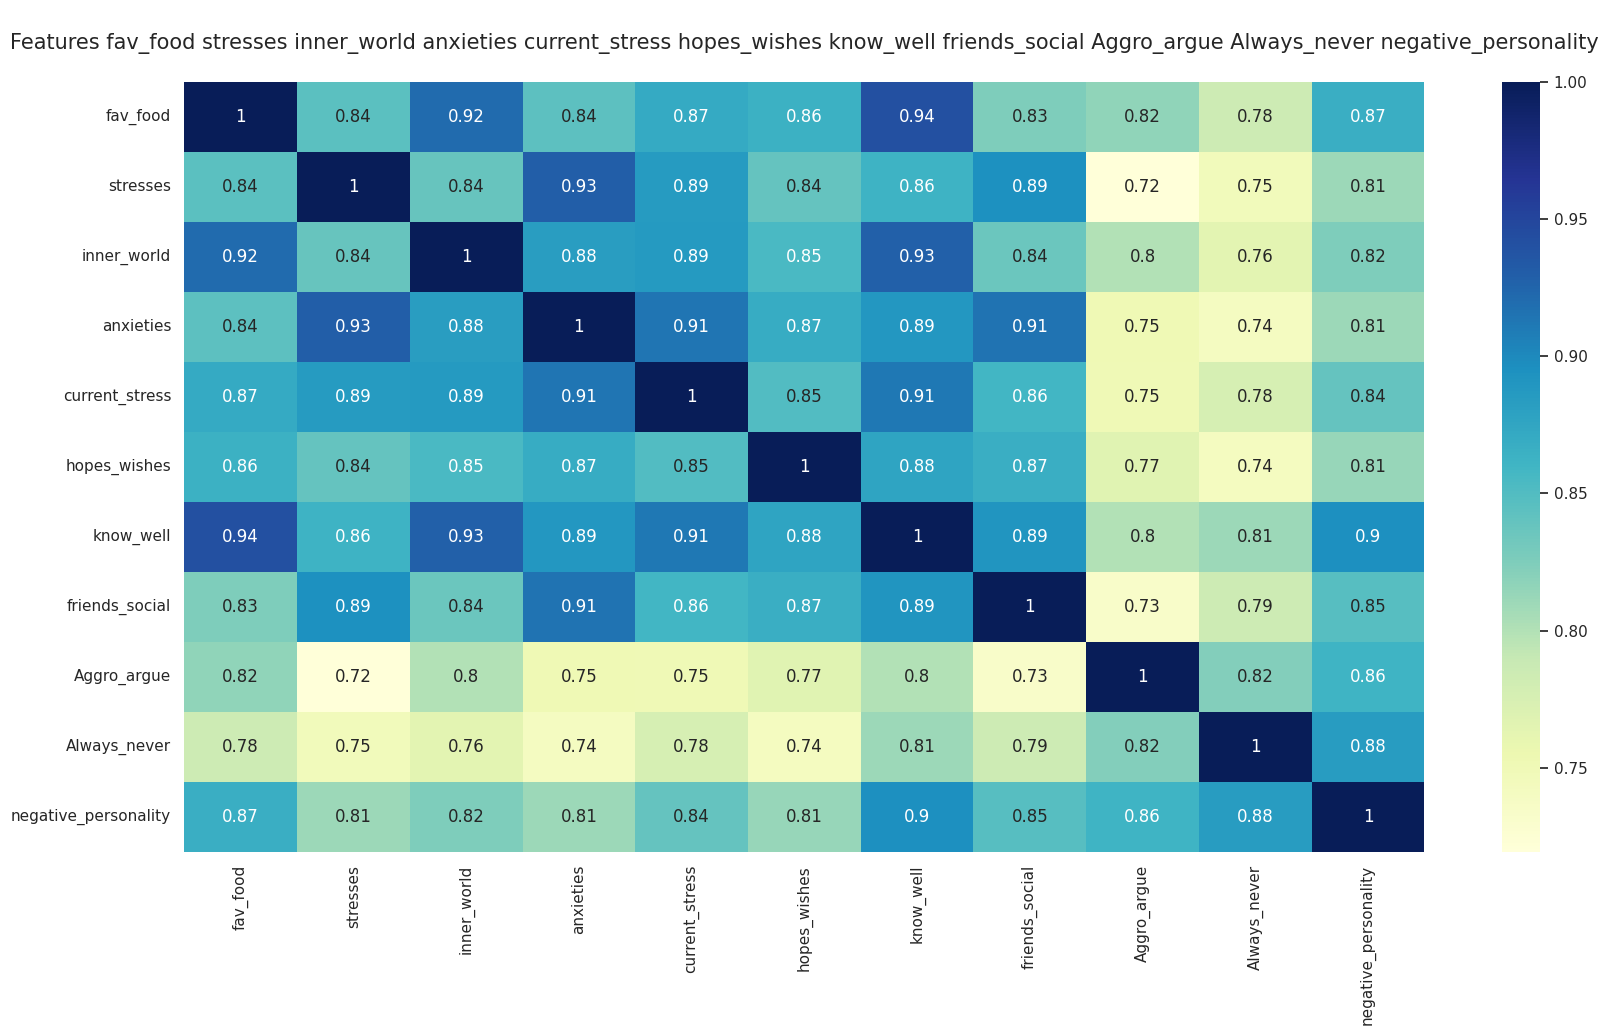

In [90]:
corr=df[col_names[22:33]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[22:33]])+"\n",fontsize=15);

For the fourth set of 11 features

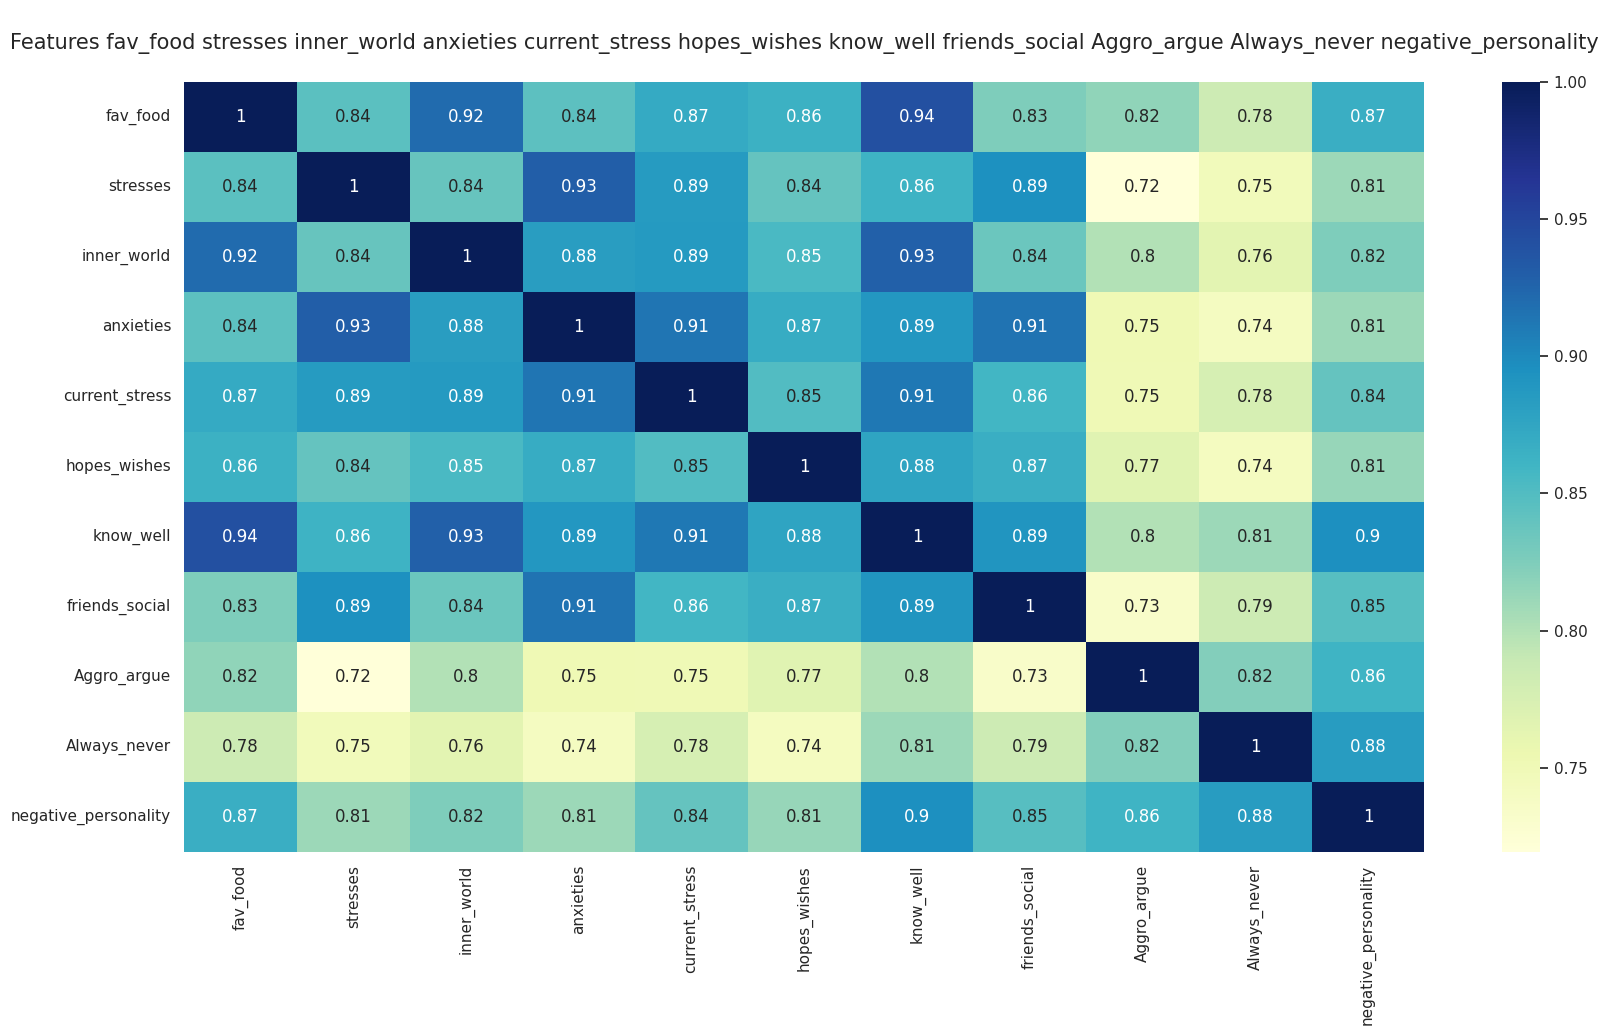

In [91]:
corr=df[col_names[22:33]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[22:33]])+"\n",fontsize=15);

For the fifth set of 11 features

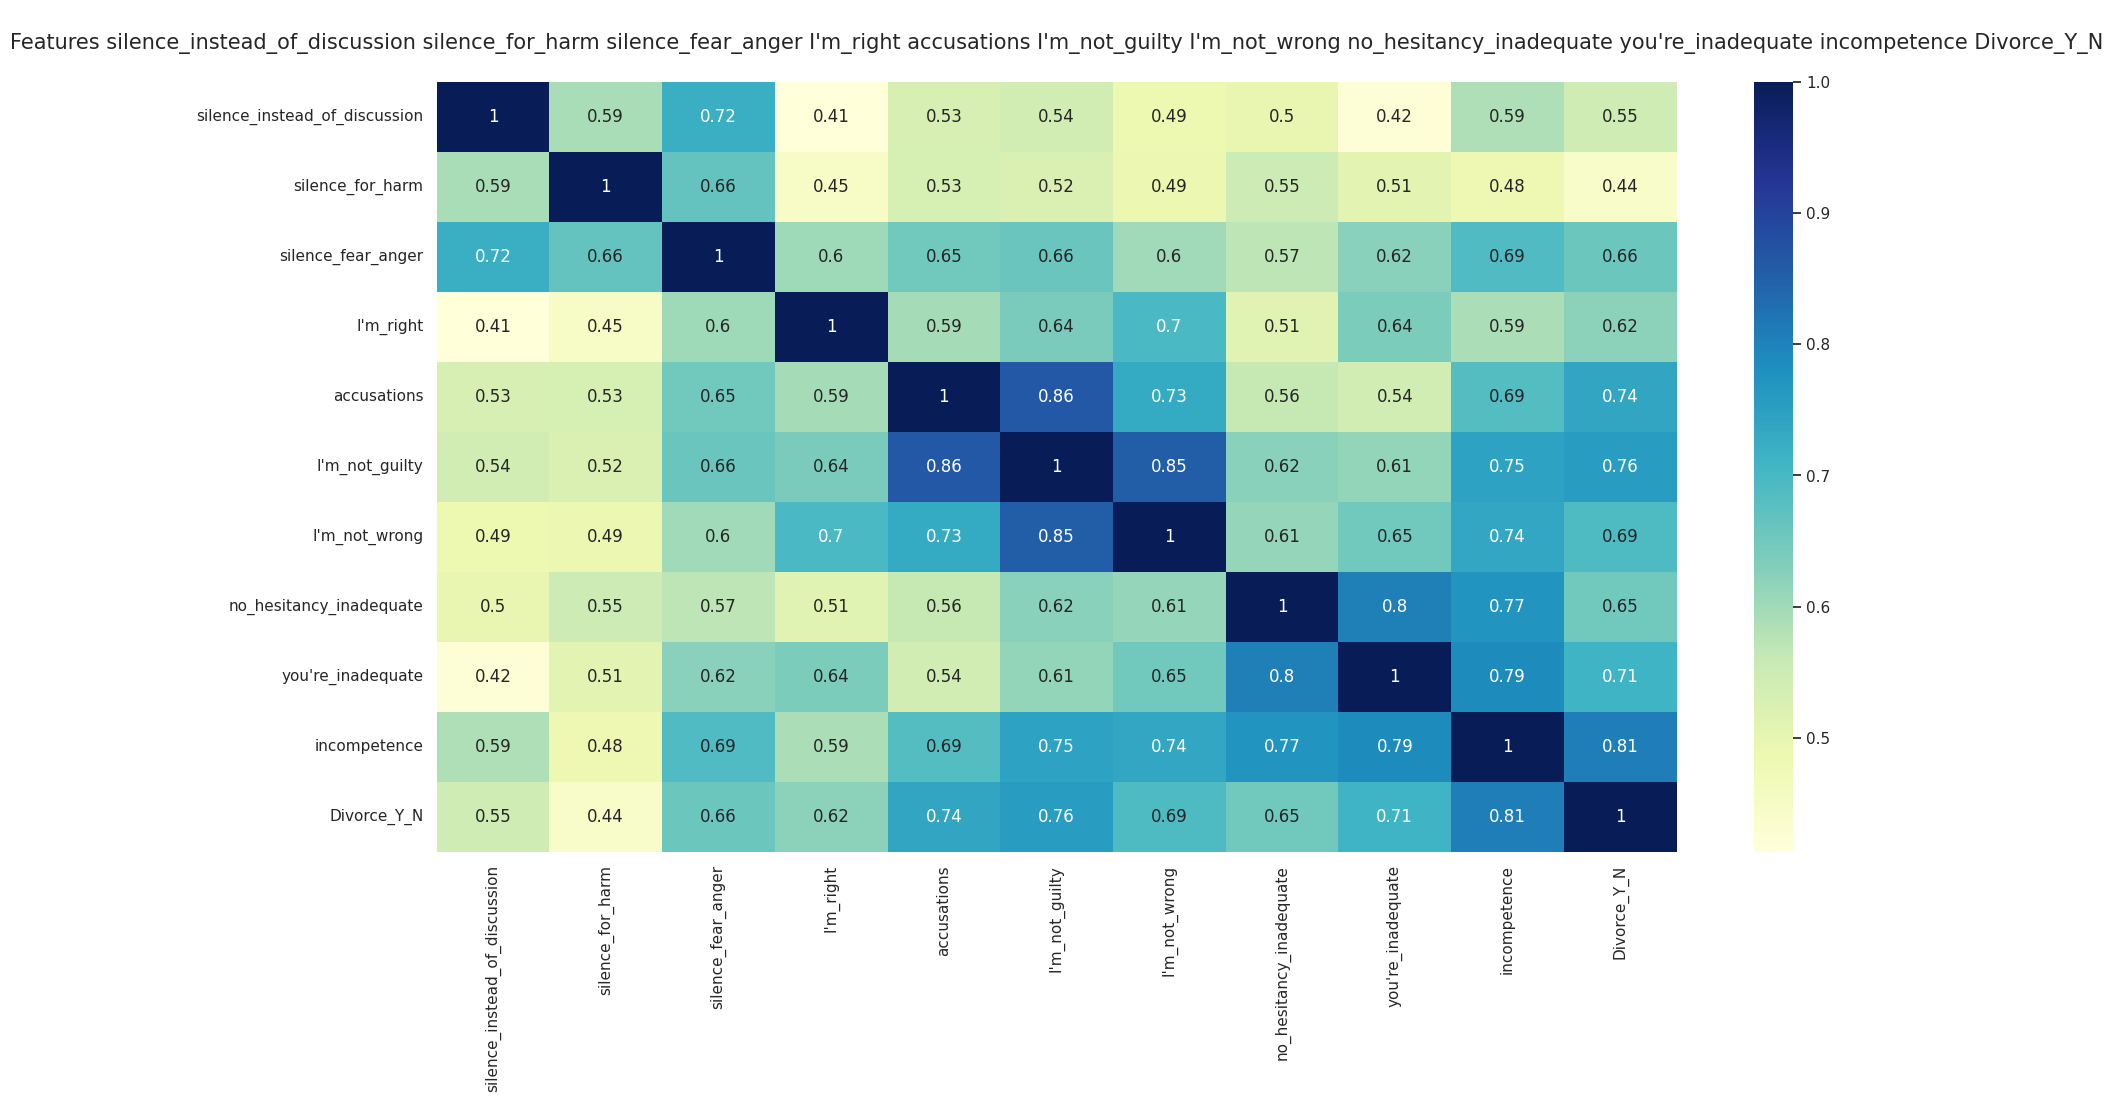

In [92]:
corr=df[col_names[44:55]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[44:55]])+"\n",fontsize=15);

**Insights**
*  There is high correlation between some features and very low correlation between other features

#Correlation Analysis of features against the target

In [93]:
col_names.remove('Divorce_Y_N')

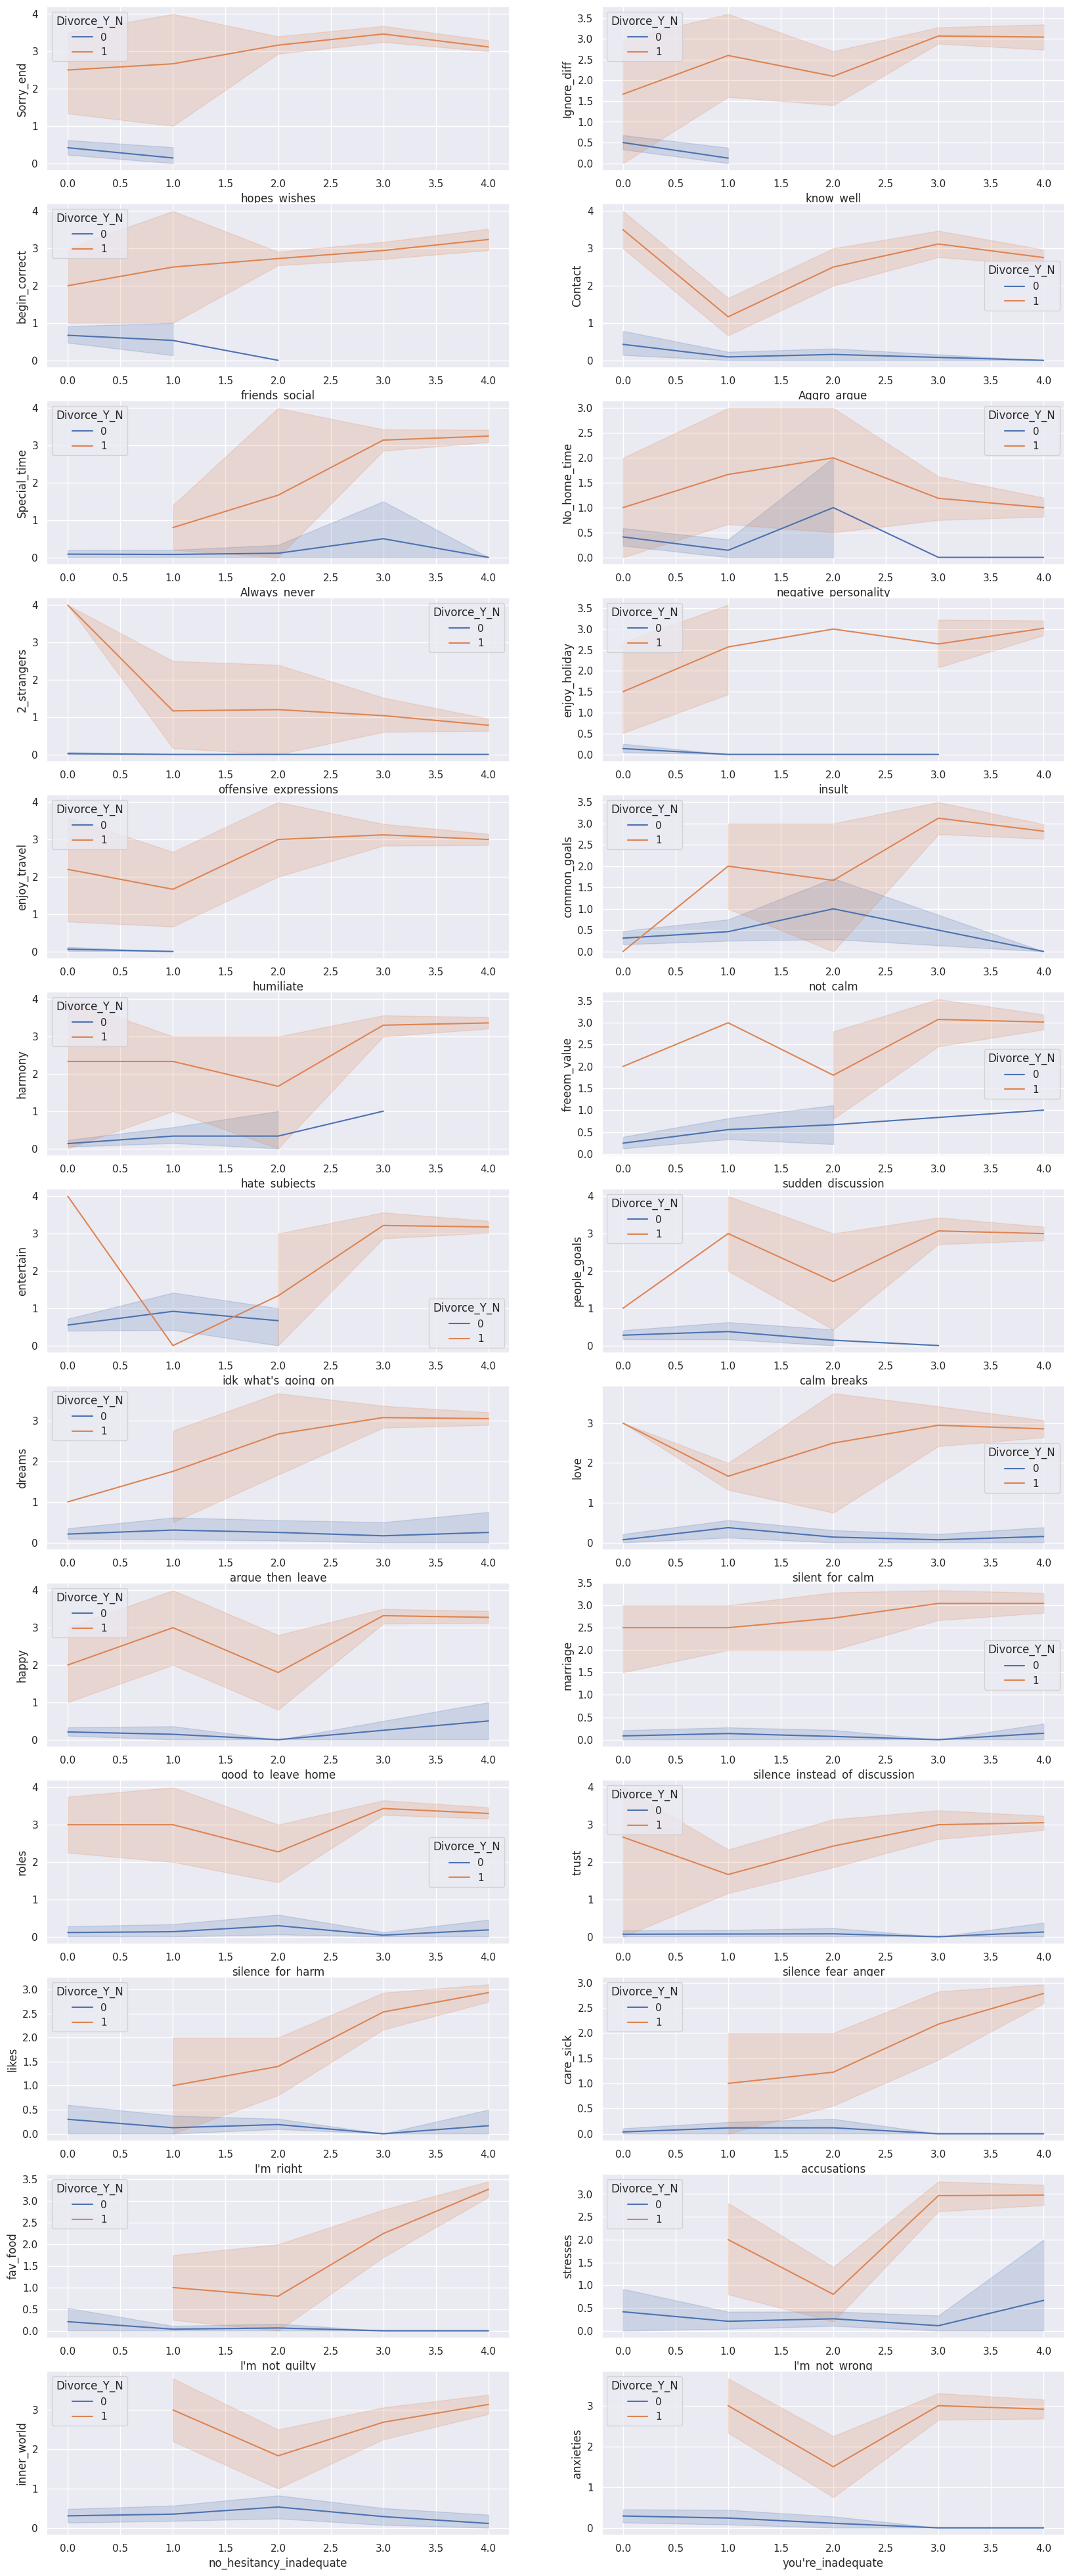

In [94]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names[:26], 1):
    x=col_names[i+26]
    plt.subplot(13,2,i)
    p=sns.lineplot(hue='Divorce_Y_N',x=x,y=column,data=df,color='blue')

**Insights**
* We can detect linearly seperable sections

# Data Modelling

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
import xgboost as xgbcx

In [96]:
X=df[col_names]
Y=df['Divorce_Y_N']

In [97]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15,random_state=3)
xgb = XGBClassifier(learning_rate=0.02,subsample=0.8,min_child_weight=0.5,max_depth=4,gamma=1,colsample_bytree=0.8, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,random_state=3)
xgb.fit(train_X, train_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [98]:
scores = cross_val_score(xgb, train_X, train_Y, cv=5)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, test_X, test_Y, cv=kfold )

In [99]:
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean());

Mean cross-validation score: 0.97
K-fold CV average score: 0.90


#Feature Importance by XGBoost with SHAP

In [100]:
import shap
explainer   = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xgbcx.DMatrix(df[col_names]))

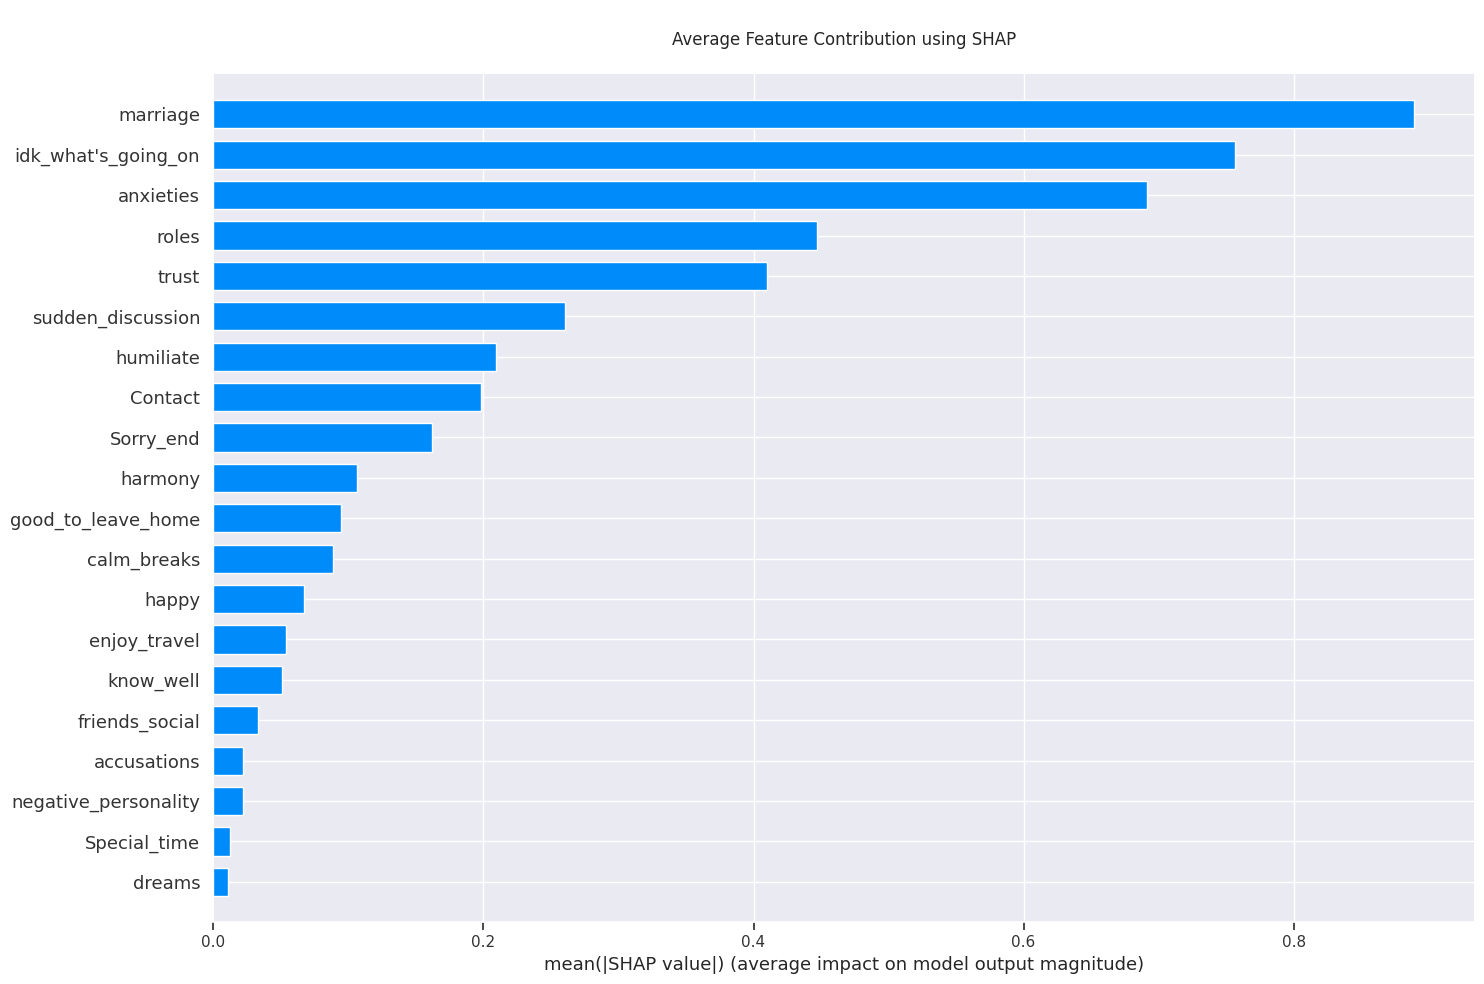

In [101]:
plt.title('\nAverage Feature Contribution using SHAP\n')
shap.summary_plot(shap_values, df[col_names], plot_type="bar", plot_size = (15,10))

In [102]:
from sklearn.linear_model import LogisticRegression
#importing RFE
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 6 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

# Fits the eliminator to the data
rfe.fit(train_X, train_Y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

#  closer look at top 3 features

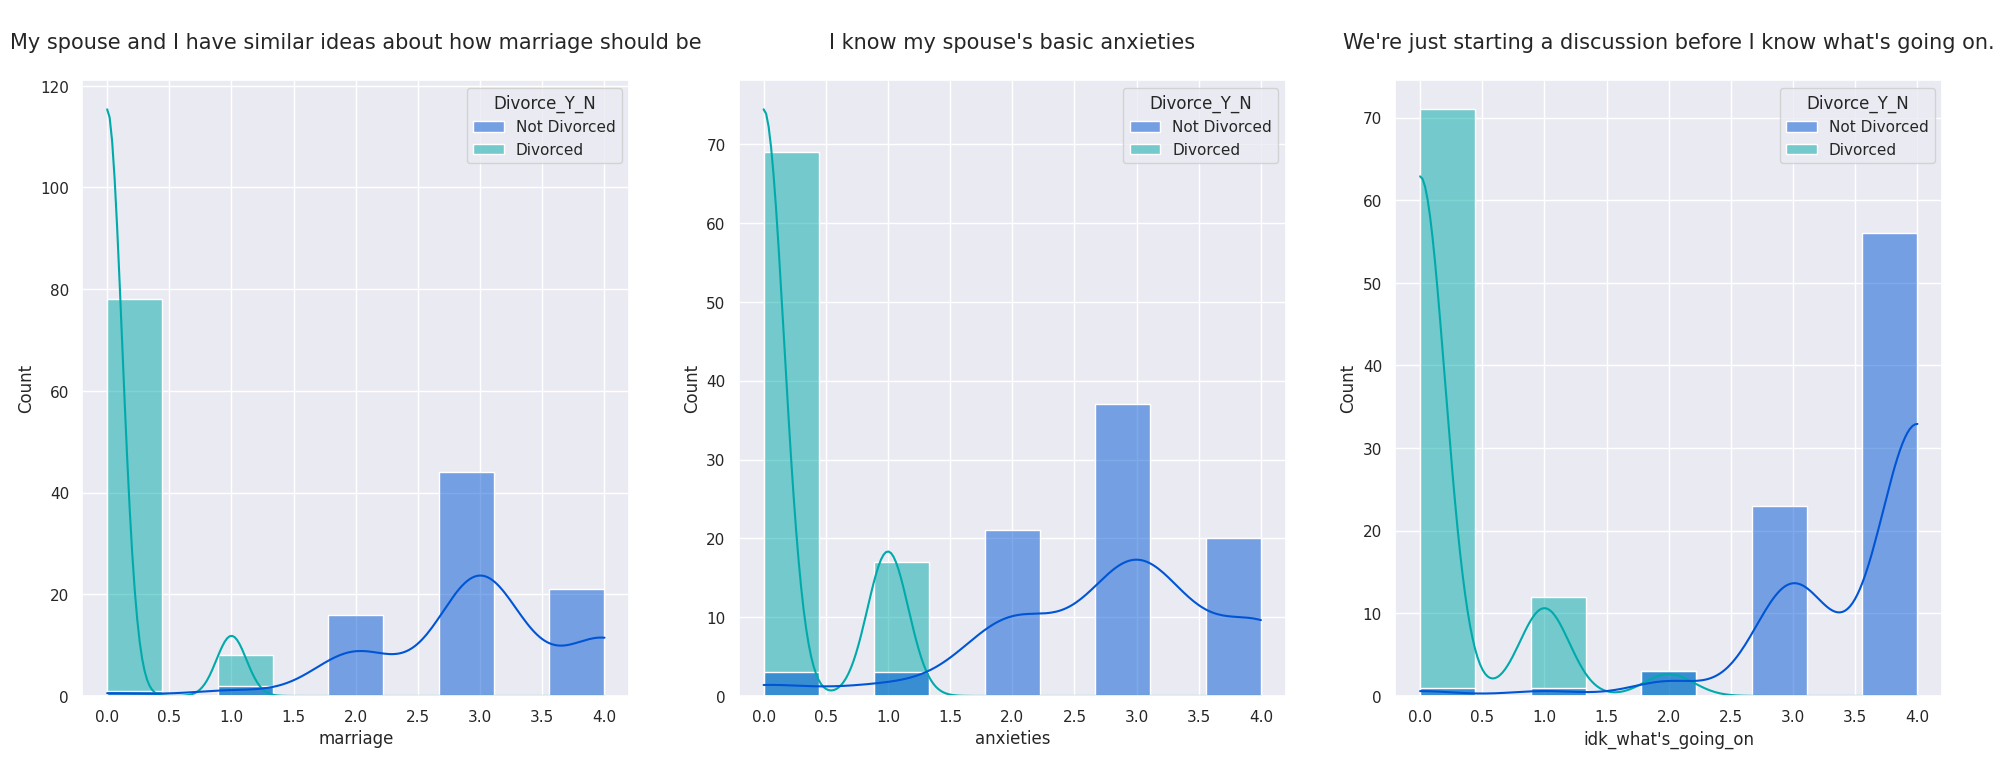

In [103]:
data=dict(zip(df.columns, rfe.ranking_))
rfe_data= {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

data['col_name']=data.index
tXGB=list(data['col_name'][:5])

rf_resultX = pd.DataFrame(shap_values, columns = col_names)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(col_names, vals)),columns=['col_name','score'])
shap_importance.sort_values(by=['score'],ascending=False, inplace=True)
tSHAP=list(shap_importance['col_name'][:5])

tRFE= list(rfe_data.keys())[:6]

common=list(set(tSHAP).intersection(set(tXGB)))
common=list(set(common).intersection(set(tRFE)))

features_full={"marriage": "My spouse and I have similar ideas about how marriage should be", "idk_what's_going_on" : "We're just starting a discussion before I know what's going on.","trust" : "My spouse and I have similar values in trust.","anxieties" : "I know my spouse's basic anxieties"}
dfx=df.copy()
dfx["Divorce_Y_N"].replace({0: "Divorced", 1: "Not Divorced"}, inplace=True)
sns.set(rc={'figure.figsize':(24,8)})
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(common, 1):
    plt.subplot(1,3,i)
    p=sns.histplot(x=column,data=dfx,hue="Divorce_Y_N",stat='count',kde=True,palette='winter')
    p.axes.set_title("\n"+str(features_full[column])+"\n",fontsize=15);

**Top features**

*   marriage - My spouse and I have similar ideas about how marriage should be
*   idk_what's_going_on - We're just starting a discussion before I know what's going on.
*   anxieties - I know my spouse's basic anxieties

**idk_what's_going_on - We're just starting a discussion before I know what's going on.**

Insights:

*  Let each others know what's going onn, then start fighting.




**marriage - My spouse and I have similar ideas about how marriage should be.**

Insights:

*  Discuss about marriage before marriage!

**anxieties - I know my spouse's basic anxieties.**

Insights:

* Knowing basic anxieties reduces divorce chances.
* Even simple disturbance can cause divorce here.


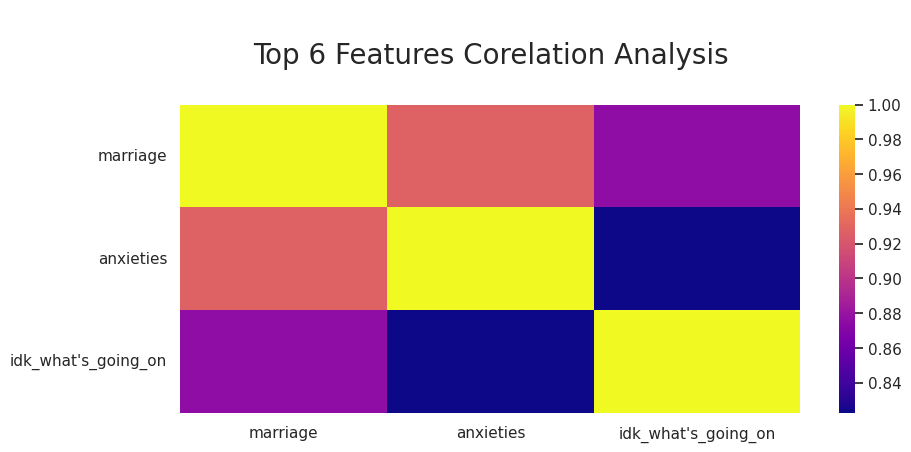

In [104]:
corr=df[common].corr()
sns.set(rc={'figure.figsize':(10,4)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="plasma")
p.axes.set_title("\nTop 6 Features Corelation Analysis\n",fontsize=20);

top features show high correlation, as expected!

# LET'S COUNSEL

###**Effective mutual communication and shared beliefs form the cornerstone of a successful marriage, while a lack thereof can lead to divorce.**